#### About

> Overfitting and Underfitting

Overfitting is a phenomenon in machine learning where a model learns to perform exceptionally well on training data but fails to generalize to new, unseen data. This happens when the model becomes too complex and starts memorizing the training data instead of learning the underlying patterns. Therefore, the performance of the model may decrease significantly when applied to new data.



In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

In [4]:
# Split data into training and test sets
X_train, X_test = X[:60], X[60:]
y_train, y_test = y[:60], y[60:]

/tmp/ipykernel_12132/488207250.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(degrees), i+1)


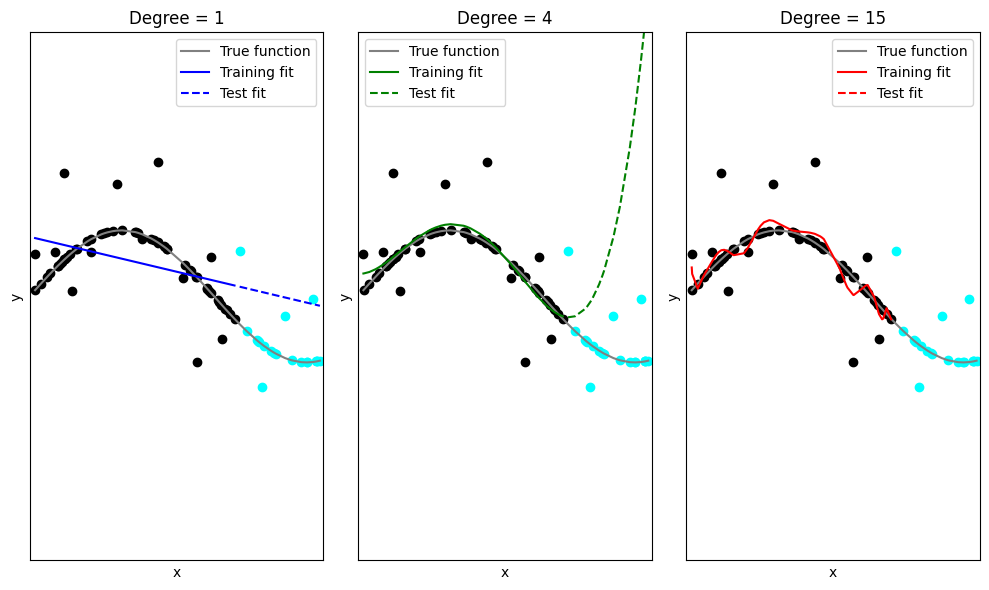

In [5]:

# Fit polynomial regression models with different degrees
degrees = [1, 4, 15]
colors = ['blue', 'green', 'red']
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.scatter(X_test, y_test, color='cyan', label='Test Data')
for i, deg in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    plt.scatter(X_train, y_train, color='black')
    plt.scatter(X_test, y_test, color='cyan')
    plt.plot(X, np.sin(X), color='gray', label='True function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 5))
    plt.ylim((-4, 4))
    plt.title('Degree = {}'.format(deg))
    X_train_poly = np.power(X_train, deg)
    X_test_poly = np.power(X_test, deg)
    model = np.polyfit(X_train.ravel(), y_train, deg)  # flatten X_train
    y_train_pred = np.polyval(model, X_train.ravel())  # flatten X_train
    y_test_pred = np.polyval(model, X_test.ravel())  # flatten X_test
    plt.plot(X_train, y_train_pred, color=colors[i], label='Training fit')
    plt.plot(X_test, y_test_pred, color=colors[i], label='Test fit', linestyle='dashed')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

> Observation

As the degree of the polynomial increases, the models become more complex and start to fit the training data more closely, resulting in better training accuracy. However, the models also start to exhibit overfitting, as they fail to generalize well to the test data, as shown by the dashed lines in the plot. This can be observed from the increasing gap between the training and test curves as the degree increases, indicating that the models are overfitting the training data and not capturing the underlying patterns in the data.

> Underfitting

Underfitting occurs when a model is too simplistic to capture the underlying patterns in the data, resulting in poor performance on both training and test data. It can occur when the model is too simple or when the data is complex and requires a more complex model.

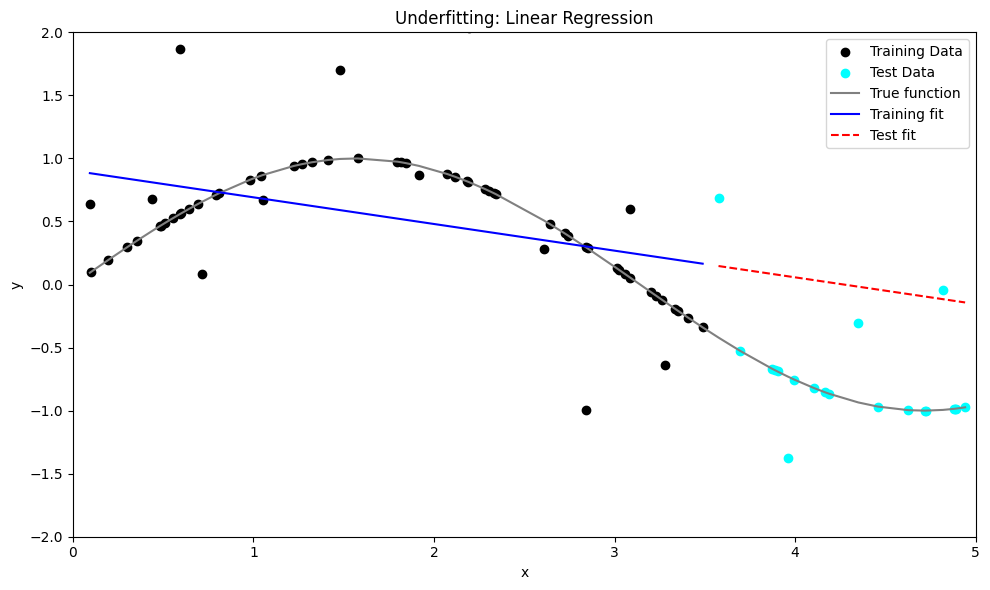

In [6]:
# Fit a linear regression model (too simple)
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.scatter(X_test, y_test, color='cyan', label='Test Data')
plt.plot(X, np.sin(X), color='gray', label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((0, 5))
plt.ylim((-2, 2))
plt.title('Underfitting: Linear Regression')
model = np.polyfit(X_train.ravel(), y_train, 1)  # linear regression
y_train_pred = np.polyval(model, X_train.ravel())
y_test_pred = np.polyval(model, X_test.ravel())
plt.plot(X_train, y_train_pred, color='blue', label='Training fit')
plt.plot(X_test, y_test_pred, color='red', label='Test fit', linestyle='dashed')
plt.legend(loc='best')
plt.tight_layout()
plt.show()